In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   
0     63    1   3       145   233    1        0      150      0      2.3  \
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [4]:
from sklearn.model_selection import train_test_split 

In [5]:
import matplotlib.pyplot as pt


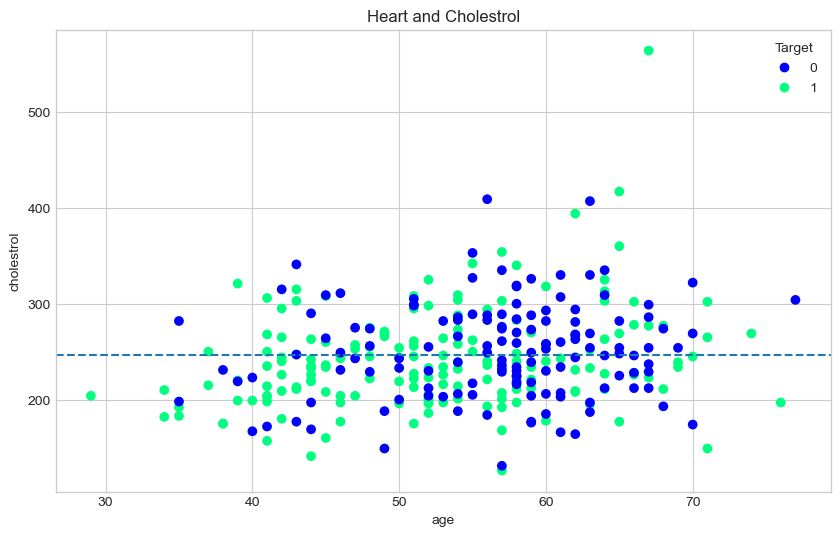

In [7]:
pt.style.use('seaborn-whitegrid')
# pure oo method
fig,ax = pt.subplots(figsize=(10,6))
#ploting
scatter = ax.scatter(x=data['age'],y=data['chol'],c=data['target'],cmap='winter')
# customizing
ax.set(title='Heart and Cholestrol',xlabel='age',ylabel='cholestrol')

# to know what colour indicates what we need to add a legend element
# adding legend
ax.legend(*scatter.legend_elements(), title='Target')

# adding a horizontal line
ax.axhline(data['chol'].mean(),linestyle='--')

In [8]:
X = data.drop(labels='target',axis=1)

In [9]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   
0     63    1   3       145   233    1        0      150      0      2.3  \
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [10]:
Y = data['target']

In [11]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [13]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   
30    41    0   1       105   198    0        1      168      0      0.0  \
234   70    1   0       130   322    0        0      109      0      2.4   
174   60    1   0       130   206    0        0      132      1      2.4   
118   46    0   1       105   204    0        1      172      0      0.0   
119   46    0   0       138   243    0        0      152      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
114   55    1   1       130   262    0        1      155      0      0.0   
156   47    1   2       130   253    0        1      179      0      0.0   
206   59    1   0       110   239    0        0      142      1      1.2   
48    53    0   2       128   216    0        0      115      0      0.0   
171   48    1   1       110   229    0        1      168      0      1.0   

     slope  ca  thal  
30       2   1     2  
234      1   3     2  
174      1   2     3  
118      2   0     2  
119      1   0     2  
..     ...  ..   ...  
114      2   0     2  
156      2   0     2  
206      1   1     3  
48       2   0     0  
171      0   0     3  

[242 rows x 13 columns]

In [14]:
y_train

30     1
234    0
174    0
118    1
119    1
      ..
114    1
156    1
206    0
48     1
171    0
Name: target, Length: 242, dtype: int64

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf = RandomForestClassifier()

In [17]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
clf.score(X_test,y_test)

0.7868852459016393

In [19]:
from sklearn.svm import LinearSVC

In [20]:
model = LinearSVC()

In [21]:
model.fit(X_train,y_train)

C:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [22]:
model.score(X_test,y_test)

0.7213114754098361

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
reg=LogisticRegression()

In [25]:
reg.fit(X_train,y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
reg.score(X_test,y_test)

0.7377049180327869

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
lr.score(X_test,y_test)

0.3686555776638294

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
gb = GaussianNB()

In [33]:
gb.fit(X_train,y_train)

GaussianNB()

In [34]:
gb.score(X_test,y_test)

0.7704918032786885

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
mb = MultinomialNB()

In [37]:
mb.fit(X_train,y_train)

MultinomialNB()

In [38]:
mb.score(X_test,y_test)

0.7213114754098361

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gbr = GradientBoostingClassifier()

In [41]:
gbr.fit(X_train,y_train)

GradientBoostingClassifier()

In [42]:
gbr.score(X_test,y_test)

0.7704918032786885

In [43]:
from sklearn.linear_model import LassoCV

In [44]:
l = LassoCV()

In [45]:
l.fit(X_train,y_train)

LassoCV()

In [46]:
l.score(X_test,y_test)

0.3810877388836045

In [49]:
gbr.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)